SWASTHIKA M 24BAD121
Accuracy : 0.9757847533632287
Precision: 0.9072847682119205
Recall   : 0.9133333333333333
F1 Score : 0.9102990033222591

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


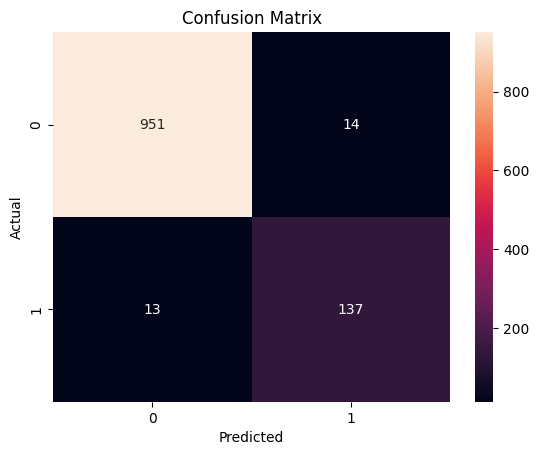

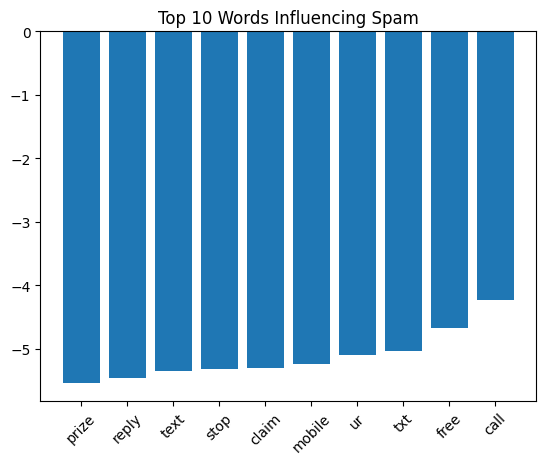

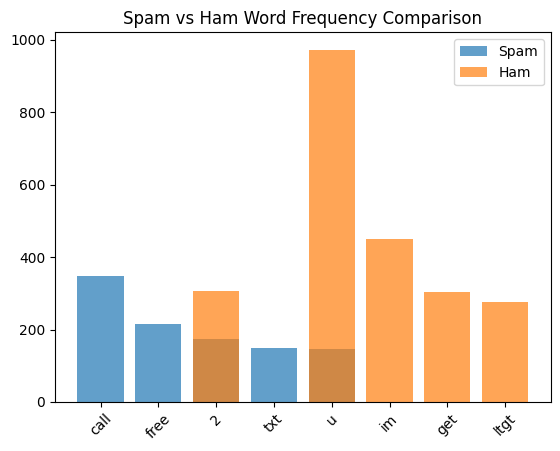

In [ ]:
print("SWASTHIKA M 24BAD121")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nltk.download('stopwords')

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df[['v1','v2']]
df.columns = ['label','message']

# -----------------------------
# 2. Preprocessing
# -----------------------------
def clean_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char not in string.punctuation)
    return text

df['clean_message'] = df['message'].apply(clean_text)

stop_words = set(stopwords.words('english'))
df['clean_message'] = df['clean_message'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

# -----------------------------
# 3. Feature Extraction
# -----------------------------
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

le = LabelEncoder()
y = le.fit_transform(df['label'])

# -----------------------------
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train Model
# -----------------------------
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================
# GRAPH 1 – Confusion Matrix
# =============================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# GRAPH 2 – Top 10 Spam Words

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]

top_indices = np.argsort(spam_probs)[-10:]
top_words = [feature_names[i] for i in top_indices]
top_values = spam_probs[top_indices]

plt.figure()
plt.bar(top_words, top_values)
plt.xticks(rotation=45)
plt.title("Top 10 Words Influencing Spam")
plt.show()

# =============================
# GRAPH 3 – Spam vs Ham Comparison
# =============================
spam_messages = df[df['label'] == 'spam']['clean_message']
ham_messages = df[df['label'] == 'ham']['clean_message']

spam_words = pd.Series(' '.join(spam_messages).split()).value_counts().head(5)
ham_words = pd.Series(' '.join(ham_messages).split()).value_counts().head(5)

plt.figure()
plt.bar(spam_words.index, spam_words.values, alpha=0.7, label="Spam")
plt.bar(ham_words.index, ham_words.values, alpha=0.7, label="Ham")
plt.xticks(rotation=45)
plt.legend()
plt.title("Spam vs Ham Word Frequency Comparison")
plt.show()


SWASTHIKA M 24BAD121
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



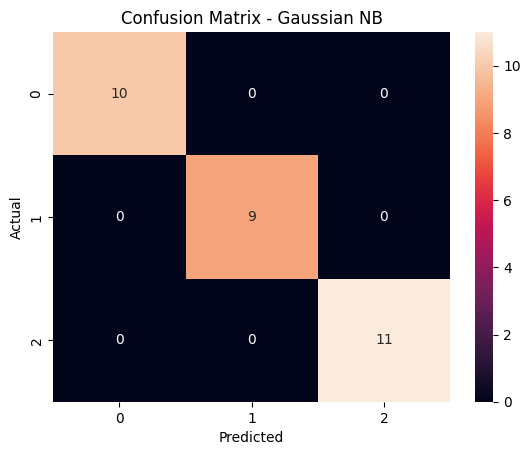

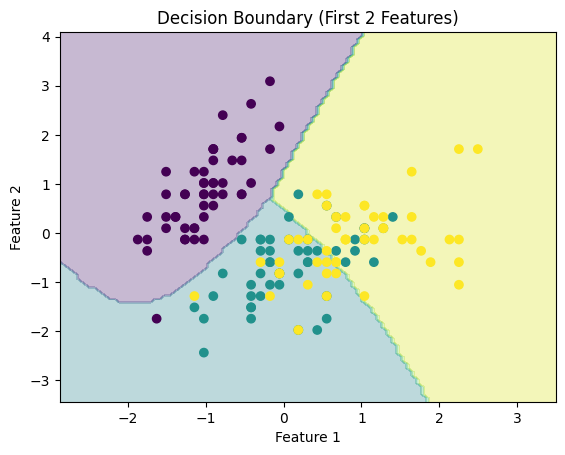

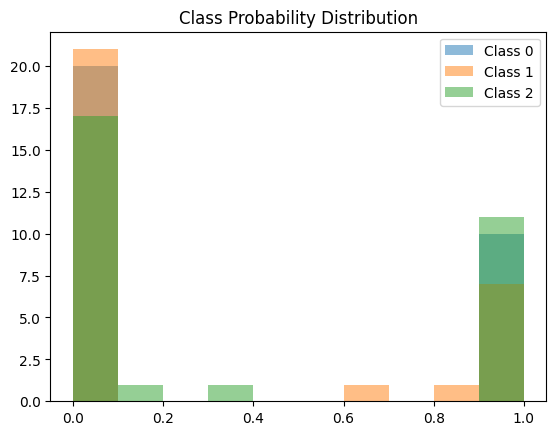


Logistic Regression Accuracy: 1.0


In [1]:
print("SWASTHIKA M 24BAD121")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1. Load Iris Dataset
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target

print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)

# -----------------------------
# 2. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Train Gaussian NB
# -----------------------------
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# -----------------------------
# 5. Prediction
# -----------------------------
y_pred = gnb.predict(X_test)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================
# GRAPH 1 – Confusion Matrix
# =============================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================
# GRAPH 2 – Decision Boundary (Using 2 Features)
# =============================

X2 = X_scaled[:, :2]  # First two features

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = gnb2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.title("Decision Boundary (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# =============================
# GRAPH 3 – Probability Distribution Plot
# =============================
probabilities = gnb.predict_proba(X_test)

plt.figure()
plt.hist(probabilities[:, 0], alpha=0.5, label="Class 0")
plt.hist(probabilities[:, 1], alpha=0.5, label="Class 1")
plt.hist(probabilities[:, 2], alpha=0.5, label="Class 2")
plt.legend()
plt.title("Class Probability Distribution")
plt.show()

# -----------------------------
# 7. Compare with Logistic Regression
# -----------------------------
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))